# Figure Production

This notebook produces the figures used in Tensor Deli journal paper

Import packages and set some display defaults

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.patches as mpatches
import glob
import tensor_sandwich as ts
import tensorly as tl
import timeit
from mpl_toolkits.axes_grid1 import ImageGrid
import matplotlib as mpl
import pickle
import scipy.io
from tensorly.decomposition import parafac

In [2]:
pd.set_option('display.max_rows', 500)
plt.rcParams['font.size'] = 20
mpl.rcParams['figure.dpi'] = 300

## Basic Four Mode Study, Adaptive, Adpative + ALS vs Non-adaptive vs ALS

Load the raw data from the trials from the rank study csv, group and than average the trials once grouping by rank, gamma (which drives sample complexity within slices), as well as adaptive sampling or not

In [3]:
col_types = {'trial':int, 
             'n':int, 
             'r':int, 
             'order':int,
             'SNR':float, 
             'mode':str,
             'alpha':float,
             'slices':int,
             'beta':float,
             'delta':float,
             'gamma':float,
             'time':float,
             'rel_error':float,
             'matrix budget':int,
             'total budget':int,
             'revealed':float,
             'post_als_rel_error':float,
             'just_als_rel_error':float}


df_basic = pd.read_csv("data/four_mode_basic.csv").astype(col_types)
group_deli = df_basic.groupby(['r','gamma','adaptive'])

group_deli_summary = group_deli.agg( {'trial':'count', 
                                 'n':'min',
                                 'order':'min',
                                 'SNR':'min', 
                                 'mode':'min',
                                 'alpha':'min',
                                 'slices':'min',
                                 'beta':'min',
                                 'delta':'min',
                                 'time':'mean',
                                 'rel_error':'median',
                                 'matrix budget':'mean',
                                 'total budget':'mean',
                                 'revealed':'mean',
                                 'post_als_rel_error':'median',
                                 'just_als_rel_error':'median'})

group_deli_summary = group_deli_summary.reset_index()

You can view the aggregated table of data

In [4]:
group_deli_summary

r  gamma  adaptive  trial    n  order  SNR  mode  alpha  slices  beta  \
0    5    0.1     False     10  100      4  inf  deli    2.0       2   0.5   
1    5    0.1      True     10  100      4  inf  deli    2.0       2   0.5   
2    5    0.2     False     10  100      4  inf  deli    2.0       2   0.5   
3    5    0.2      True     10  100      4  inf  deli    2.0       2   0.5   
4    5    0.3     False     10  100      4  inf  deli    2.0       2   0.5   
5    5    0.3      True     10  100      4  inf  deli    2.0       2   0.5   
6    5    0.4     False     10  100      4  inf  deli    2.0       2   0.5   
7    5    0.4      True     10  100      4  inf  deli    2.0       2   0.5   
8    5    0.5     False     10  100      4  inf  deli    2.0       2   0.5   
9    5    0.5      True     10  100      4  inf  deli    2.0       2   0.5   
10   5    0.6     False     10  100      4  inf  deli    2.0       2   0.5   
11   5    0.6      True     10  100      4  inf  deli    2.0       2   0.5   
12   5    0.7     False     10  100      4  inf  deli    2.0       2   0.5   
13   5    0.7      True     10  100      4  inf  deli    2.0       2   0.5   
14   5    0.8     False     10  100      4  inf  deli    2.0       2   0.5   
15   5    0.8      True     10  100      4  inf  deli    2.0       2   0.5   
16  10    0.1     False     10  100      4  inf  deli    2.0       2   0.5   
17  10    0.1      True     10  100      4  inf  deli    2.0       2   0.5   
18  10    0.2     False     10  100      4  inf  deli    2.0       2   0.5   
19  10    0.2      True     10  100      4  inf  deli    2.0       2   0.5   
20  10    0.3     False     10  100      4  inf  deli    2.0       2   0.5   
21  10    0.3      True     10  100      4  inf  deli    2.0       2   0.5   
22  10    0.4     False     10  100      4  inf  deli    2.0       2   0.5   
23  10    0.4      True     10  100      4  inf  deli    2.0       2   0.5   
24  10    0.5     False     10  100      4  inf  deli    2.0       2   0.5   
25  10    0.5      True     10  100      4  inf  deli    2.0       2   0.5   
26  10    0.6     False     10  100      4  inf  deli    2.0       2   0.5   
27  10    0.6      True     10  100      4  inf  deli    2.0       2   0.5   
28  10    0.7     False     10  100      4  inf  deli    2.0       2   0.5   
29  10    0.7      True     10  100      4  inf  deli    2.0       2   0.5   
30  10    0.8     False     10  100      4  inf  deli    2.0       2   0.5   
31  10    0.8      True     10  100      4  inf  deli    2.0       2   0.5   
32  15    0.1     False     10  100      4  inf  deli    2.0       2   0.5   
33  15    0.1      True     10  100      4  inf  deli    2.0       2   0.5   
34  15    0.2     False     10  100      4  inf  deli    2.0       2   0.5   
35  15    0.2      True     10  100      4  inf  deli    2.0       2   0.5   
36  15    0.3     False     10  100      4  inf  deli    2.0       2   0.5   
37  15    0.3      True     10  100      4  inf  deli    2.0       2   0.5   
38  15    0.4     False     10  100      4  inf  deli    2.0       2   0.5   
39  15    0.4      True     10  100      4  inf  deli    2.0       2   0.5   
40  15    0.5     False     10  100      4  inf  deli    2.0       2   0.5   
41  15    0.5      True     10  100      4  inf  deli    2.0       2   0.5   
42  15    0.6     False     10  100      4  inf  deli    2.0       2   0.5   
43  15    0.6      True     10  100      4  inf  deli    2.0       2   0.5   
44  15    0.7     False     10  100      4  inf  deli    2.0       2   0.5   
45  15    0.7      True     10  100      4  inf  deli    2.0       2   0.5   
46  15    0.8     False     10  100      4  inf  deli    2.0       2   0.5   
47  15    0.8      True     10  100      4  inf  deli    2.0       2   0.5   

    delta        time  rel_error  matrix budget  total budget  revealed  \
0     8.0  292.745348   0.380299         1000.0        9991.7  0.000100   
1     8.0  272.788409   0.223754

### Adaptive Comparison

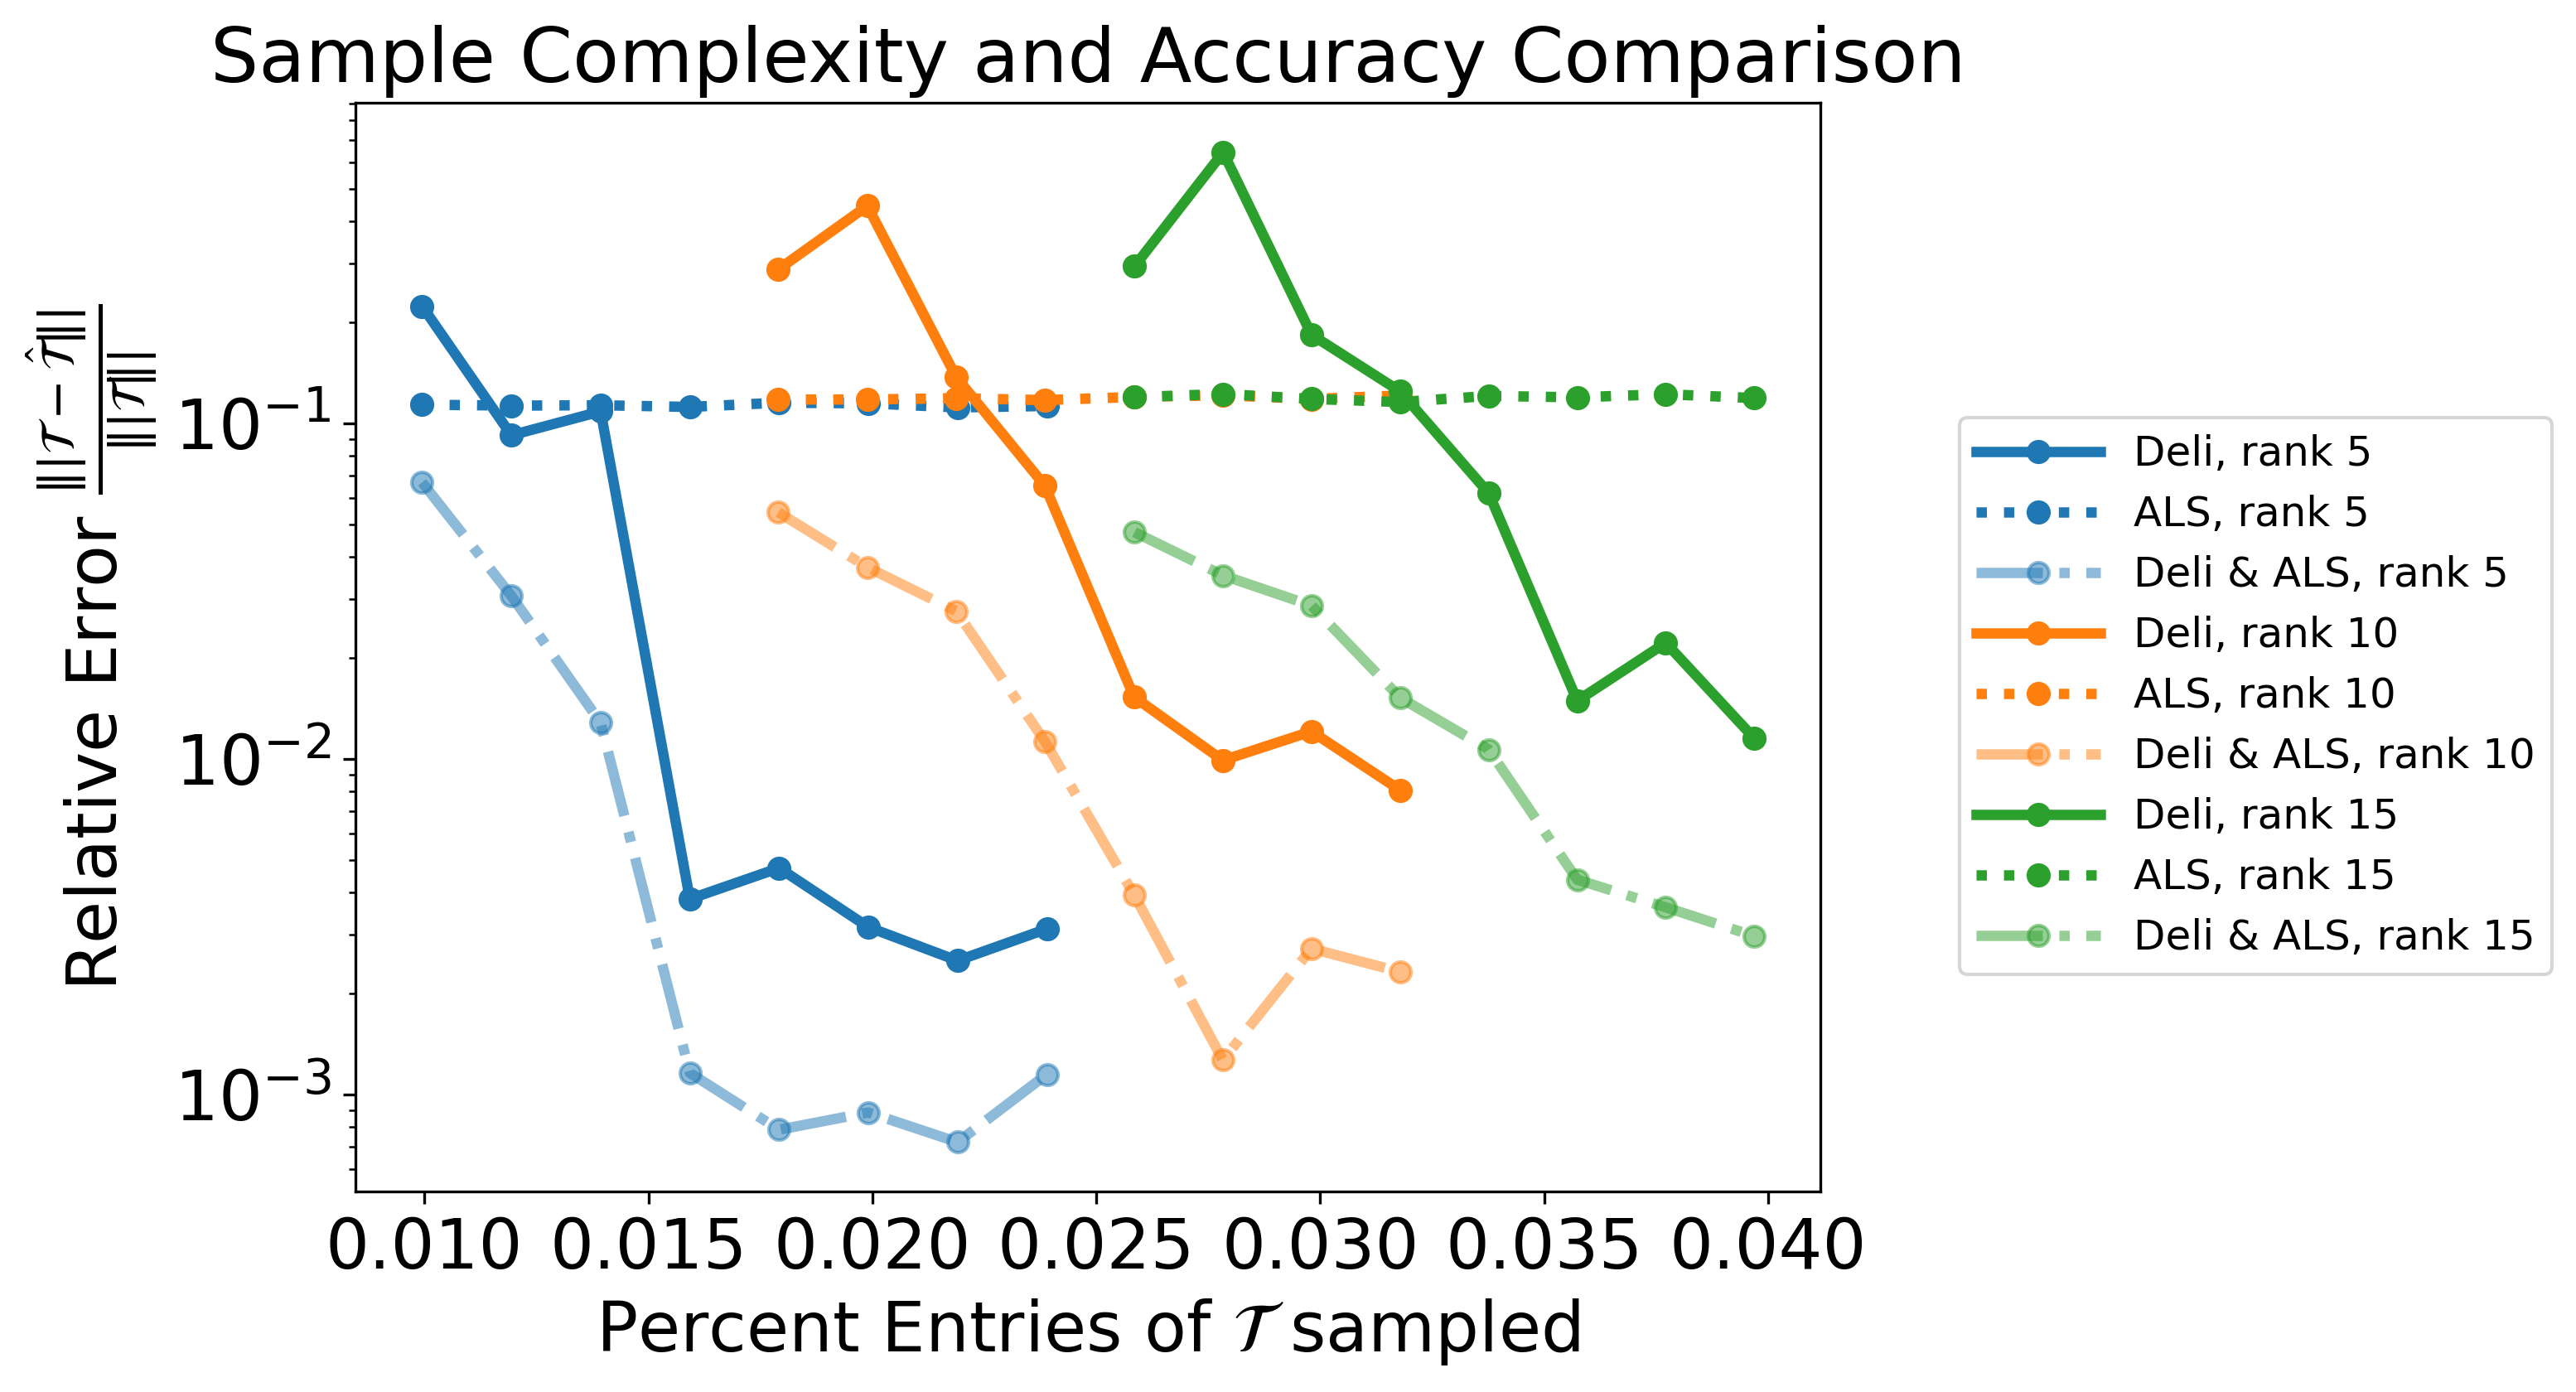

In [5]:
fig,ax = plt.subplots(figsize=(8,6))
plt.rcParams['font.size'] = 20
color_dict = {5:'C0',10:'C1',15:'C2'}
#fig.suptitle("Relative Error by Sample Complexity", fontsize=22)

df=group_deli_summary[group_deli_summary['adaptive'] == True]
for r in df['r'].unique(): 
    ax.plot(100*df[df['r']==r]['revealed'],df[df['r']==r]['rel_error'], '-o',label='Deli, rank '+str(r),linewidth=3, color=color_dict[r])
    ax.plot(100*df[df['r']==r]['revealed'],df[df['r']==r]['just_als_rel_error'], linestyle="dotted",marker="o",label='ALS, rank '+str(r),linewidth=3, color=color_dict[r])
    ax.plot(100*df[df['r']==r]['revealed'],df[df['r']==r]['post_als_rel_error'], '-.o',alpha=0.5,label='Deli & ALS, rank '+str(r),linewidth=3, color=color_dict[r])


ax.set_title("Sample Complexity and Accuracy Comparison", fontsize=22)
ax.set(xlabel="Percent Entries of $\mathcal{T}$ sampled", ylabel=r"Relative Error $\frac{\||\mathcal{T}-\mathcal{\hat{T}}\||}{\||\mathcal{T}\||}$",yscale='log')

fig.legend(loc='center left',bbox_to_anchor=(1, 0.5),fontsize=12,handlelength=3)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax.yaxis.set_tick_params(labelbottom=True)
plt.show()


### Non-adaptive Comparison

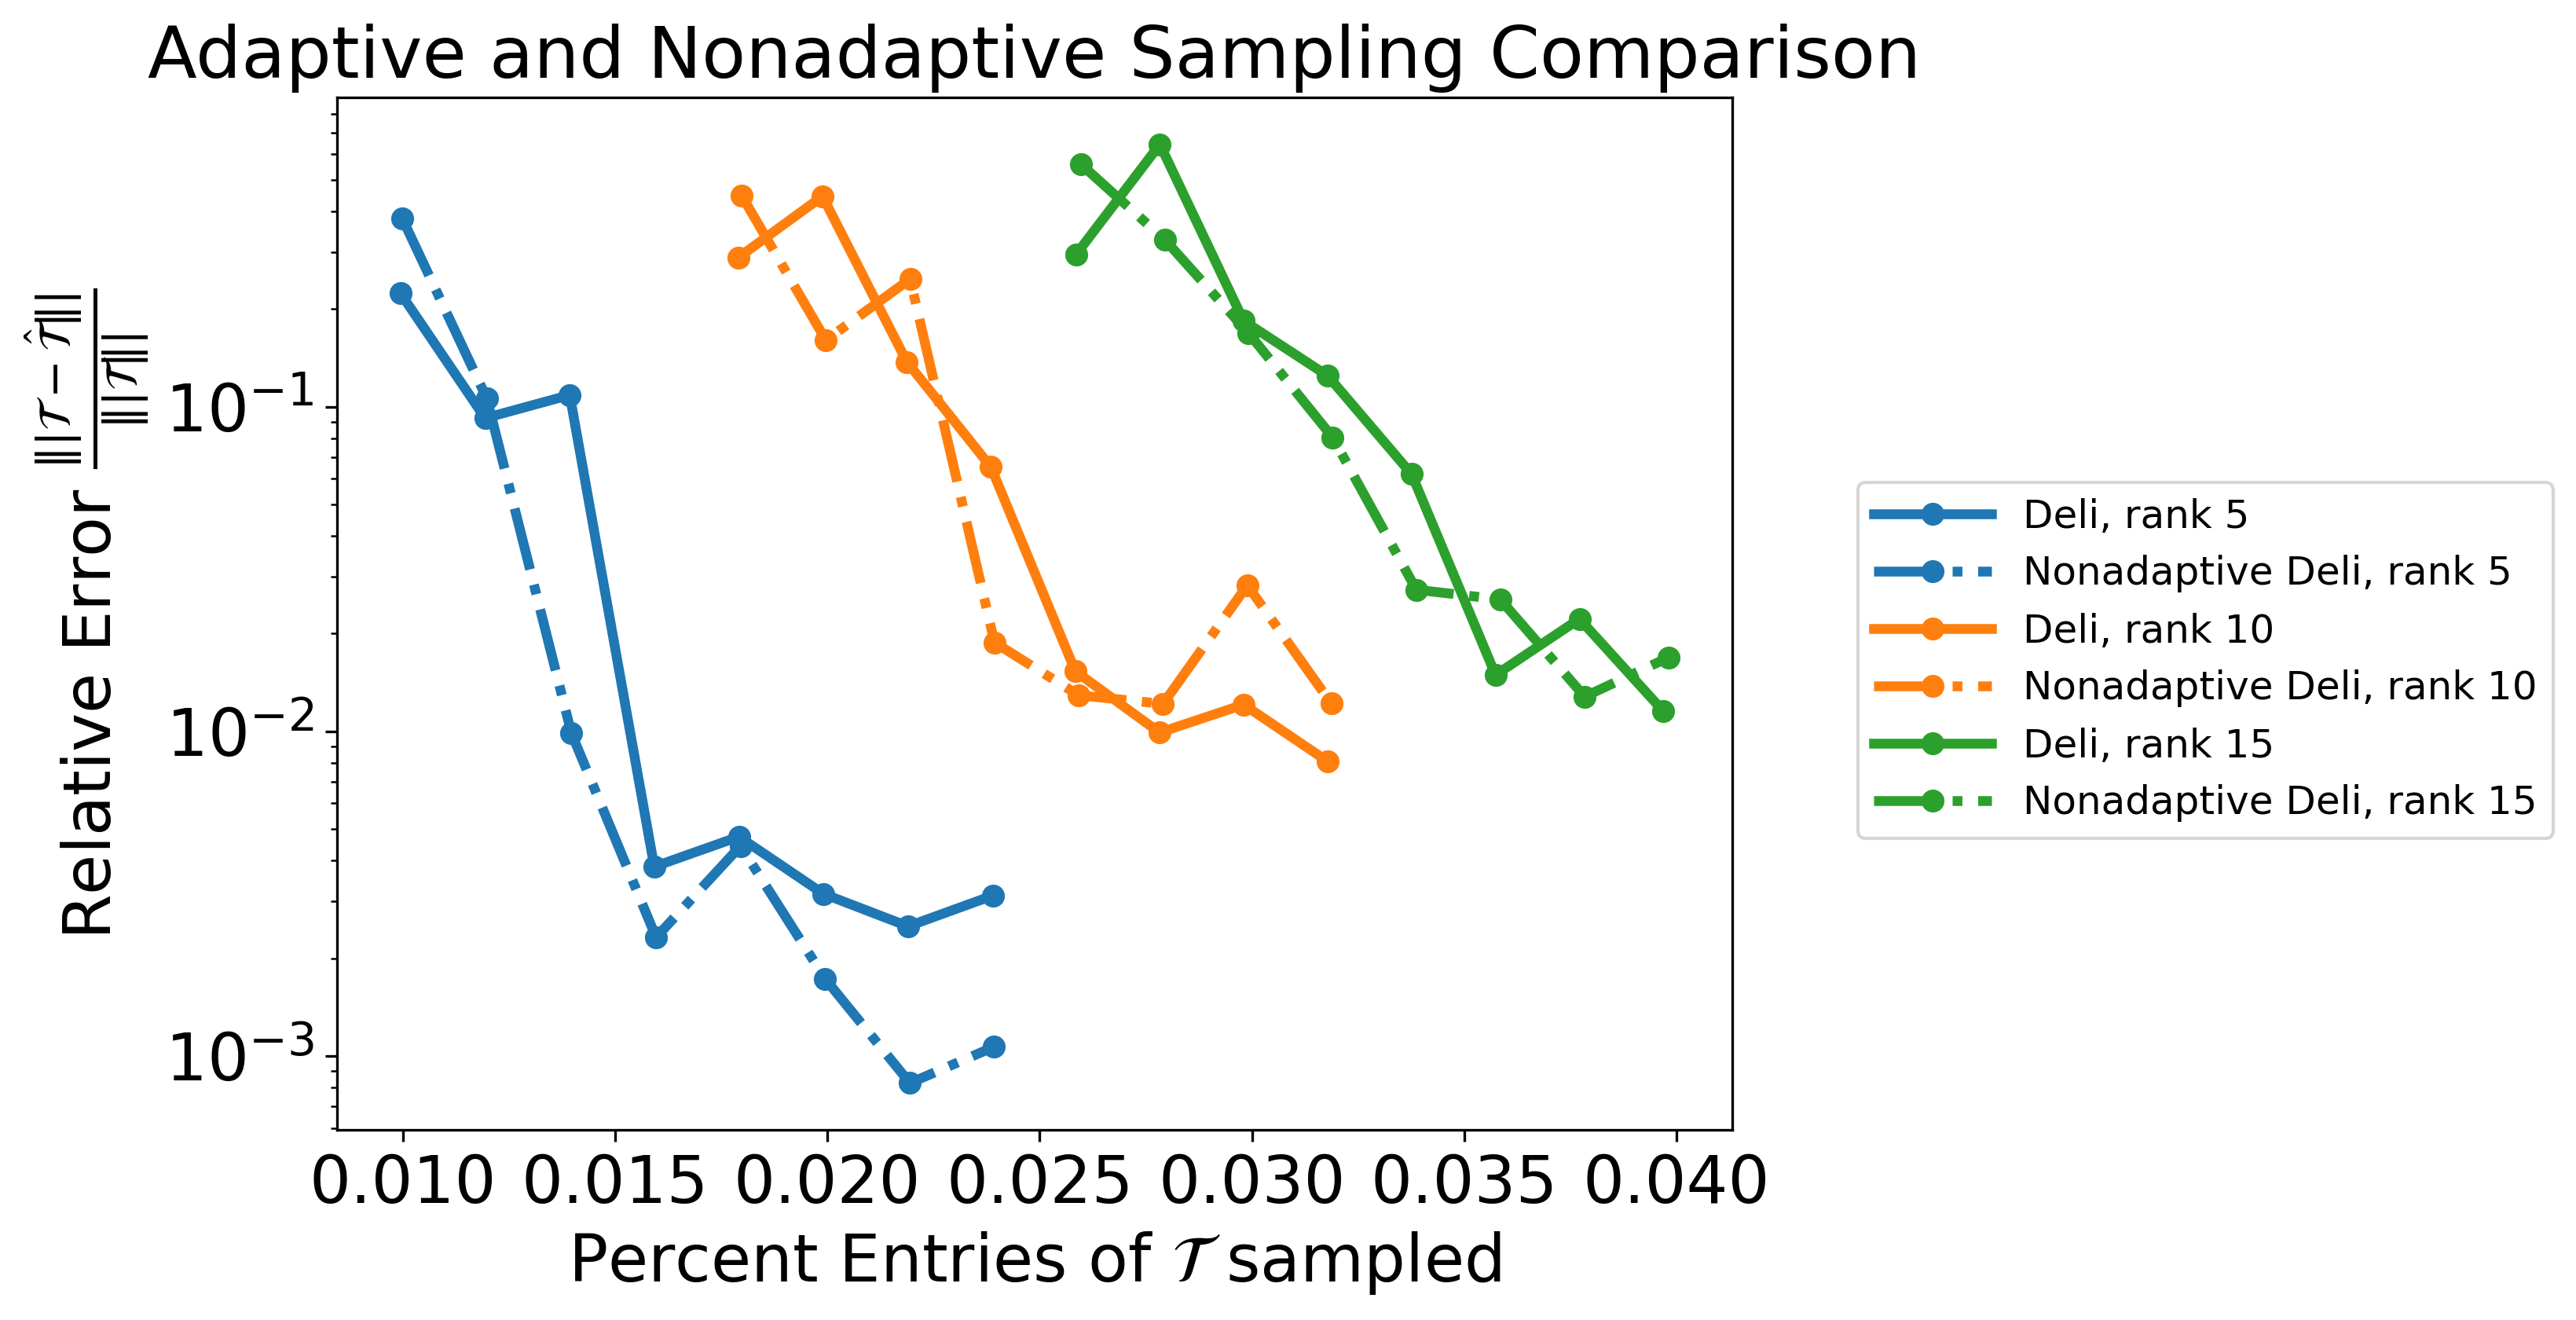

In [6]:
fig,ax = plt.subplots(figsize=(8,6))
plt.rcParams['font.size'] = 20
color_dict = {5:'C0',10:'C1',15:'C2'}
#fig.suptitle("Relative Error by Sample Complexity", fontsize=22)

df_adapt=group_deli_summary[group_deli_summary['adaptive'] == True]
df_nonadapt=group_deli_summary[group_deli_summary['adaptive'] == False]
for r in df['r'].unique(): 
    ax.plot(100*df_adapt[df_adapt['r']==r]['revealed'],df_adapt[df_adapt['r']==r]['rel_error'], '-o',label='Deli, rank '+str(r),linewidth=3, color=color_dict[r])
    ax.plot(100*df_nonadapt[df_nonadapt['r']==r]['revealed'],df_nonadapt[df_nonadapt['r']==r]['rel_error'], '-.o',label='Nonadaptive Deli, rank '+str(r),linewidth=3, color=color_dict[r])

ax.set_title("Adaptive and Nonadaptive Sampling Comparison", fontsize=22)
ax.set(xlabel="Percent Entries of $\mathcal{T}$ sampled", ylabel=r"Relative Error $\frac{\||\mathcal{T}-\mathcal{\hat{T}}\||}{\||\mathcal{T}\||}$",yscale='log')

fig.legend(loc='center left',bbox_to_anchor=(1, 0.5),fontsize=12,handlelength=3)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax.yaxis.set_tick_params(labelbottom=True)
plt.show()


## KS vs Tensor Deli Comparison

Load the raw data for the deli vs KS algorithm comparison figures

In [7]:
#data types for the columns
col_types = {'trial':int, 
             'n':int, 
             'r':int, 
             'SNR':float, 
             'slices':int,  
             'alpha':float, 
             'beta':float, 
             'delta':float, 
             'gamma':float,
             'time':float,
             'adaptive':bool,
             'inner_als':bool,
             'rel_error':float,
             'matrix budget':int,
             'total budget':int,
             'revealed':float,
             'post_als_rel_error':float}

#read in the data, give columns data types, group and aggregate
time_deli_df = pd.read_csv('data/deli_time_compare.csv').astype(col_types).groupby(['r'])
time_deli_df = time_deli_df.agg({'trial':'count',
                                           'n':'min', 
                                           'SNR':'min',
                                           'slices':'min',
                                           'alpha':'min',
                                           'beta':'min',
                                           'delta':'min',
                                           'gamma':'min',
                                           'time':'mean',
                                           'rel_error':'median',
                                           'matrix budget':'mean',
                                           'total budget':'mean',
                                           'revealed':'mean',
                                           'post_als_rel_error':'median'})
#undo multi index with an index reset
time_deli_df = time_deli_df.reset_index()


#data types for the columns
col_types = {'trial':int, 
             'n':int, 
             'r':int, 
             'SNR':float, 
             'alpha':float, 
             'sampling':str,
             'tolerance':float,
             'time':float,
             'rel_error':float,
             'revealed':float,
             'post_als_rel_error':float}

#read in the data, give columns data types, group and aggregate
time_seq_df = pd.read_csv('data/ks_time_compare.csv')
time_seq_df = time_seq_df.drop(columns='Unnamed: 0')
time_seq_df = time_seq_df.astype(col_types).groupby(['n'])
time_seq_df = time_seq_df.agg({'trial':'count',
                                           'r':'min', 
                                           'SNR':'min',
                                           'alpha':'min',
                                           'sampling':'min',
                                           'tolerance':'min',
                                           'time':'mean',
                                           'rel_error':'median',
                                           'revealed':'mean',
                                           'post_als_rel_error':'median'})
#undo multi index with an index reset
time_seq_df = time_seq_df.reset_index()

In [8]:
time_deli_df

r  trial    n  SNR  slices  alpha  beta  delta  gamma      time  \
0   5     10   50  inf       2    1.0   0.5    8.0    0.7  0.141757   
1   6     10   60  inf       2    1.0   0.5    8.0    0.7  0.412842   
2   7     10   70  inf       2    1.0   0.5    8.0    0.7  0.661313   
3   8     10   80  inf       2    1.0   0.5    8.0    0.7  1.115074   
4   9     10   90  inf       2    1.0   0.5    8.0    0.7  1.807002   
5  10     10  100  inf       2    1.0   0.5    8.0    0.7  2.492944   
6  11     10  110  inf       2    1.0   0.5    8.0    0.7  4.041036   
7  12     10  120  inf       2    1.0   0.5    8.0    0.7  4.904597   

      rel_error  matrix budget  total budget  revealed  post_als_rel_error  
0  1.831248e-14         4550.0        6550.0  0.052400        4.881276e-15  
1  2.206917e-14         6552.0        9432.0  0.043667        4.412190e-15  
2  6.658518e-04         8918.0       12838.0  0.037429        1.716166e-04  
3  2.732621e-03        11648.0       16768.0  0.032750        6.668411e-04  
4  3.853495e-03        14742.0       21222.0  0.029111        5.461517e-04  
5  2.544212e-03        18200.0       26200.0  0.026200        8.225070e-04  
6  5.081161e-03        22019.8       31699.8  0.023817        1.758014e-03  
7  8.757102e-03        26208.0       37728.0  0.021833        3.193944e-03

In [9]:
time_seq_df

n  trial   r  SNR  alpha    sampling  tolerance        time  rel_error  \
0   50     10   5  inf    1.0  [0.7, 0.1]      0.001    1.114961   0.002403   
1   60     10   6  inf    1.0  [0.7, 0.1]      0.001    2.585910   0.002612   
2   70     10   7  inf    1.0  [0.7, 0.1]      0.001    9.875973   0.003784   
3   80     10   8  inf    1.0  [0.7, 0.1]      0.001   23.282287   0.004105   
4   90     10   9  inf    1.0  [0.7, 0.1]      0.001   37.189527   0.005169   
5  100     10  10  inf    1.0  [0.7, 0.1]      0.001   70.925550   0.006578   
6  110     10  11  inf    1.0  [0.7, 0.1]      0.001  112.580230   0.011353   
7  120     10  12  inf    1.0  [0.7, 0.1]      0.001  161.806134   0.016074   

   revealed  post_als_rel_error  
0  0.172800            0.047766  
1  0.180500            0.042930  
2  0.183000            0.036715  
3  0.188375            0.038454  
4  0.193333            0.030504  
5  0.200800            0.028098  
6  0.281998            0.029988  
7  0.375902            0.025381

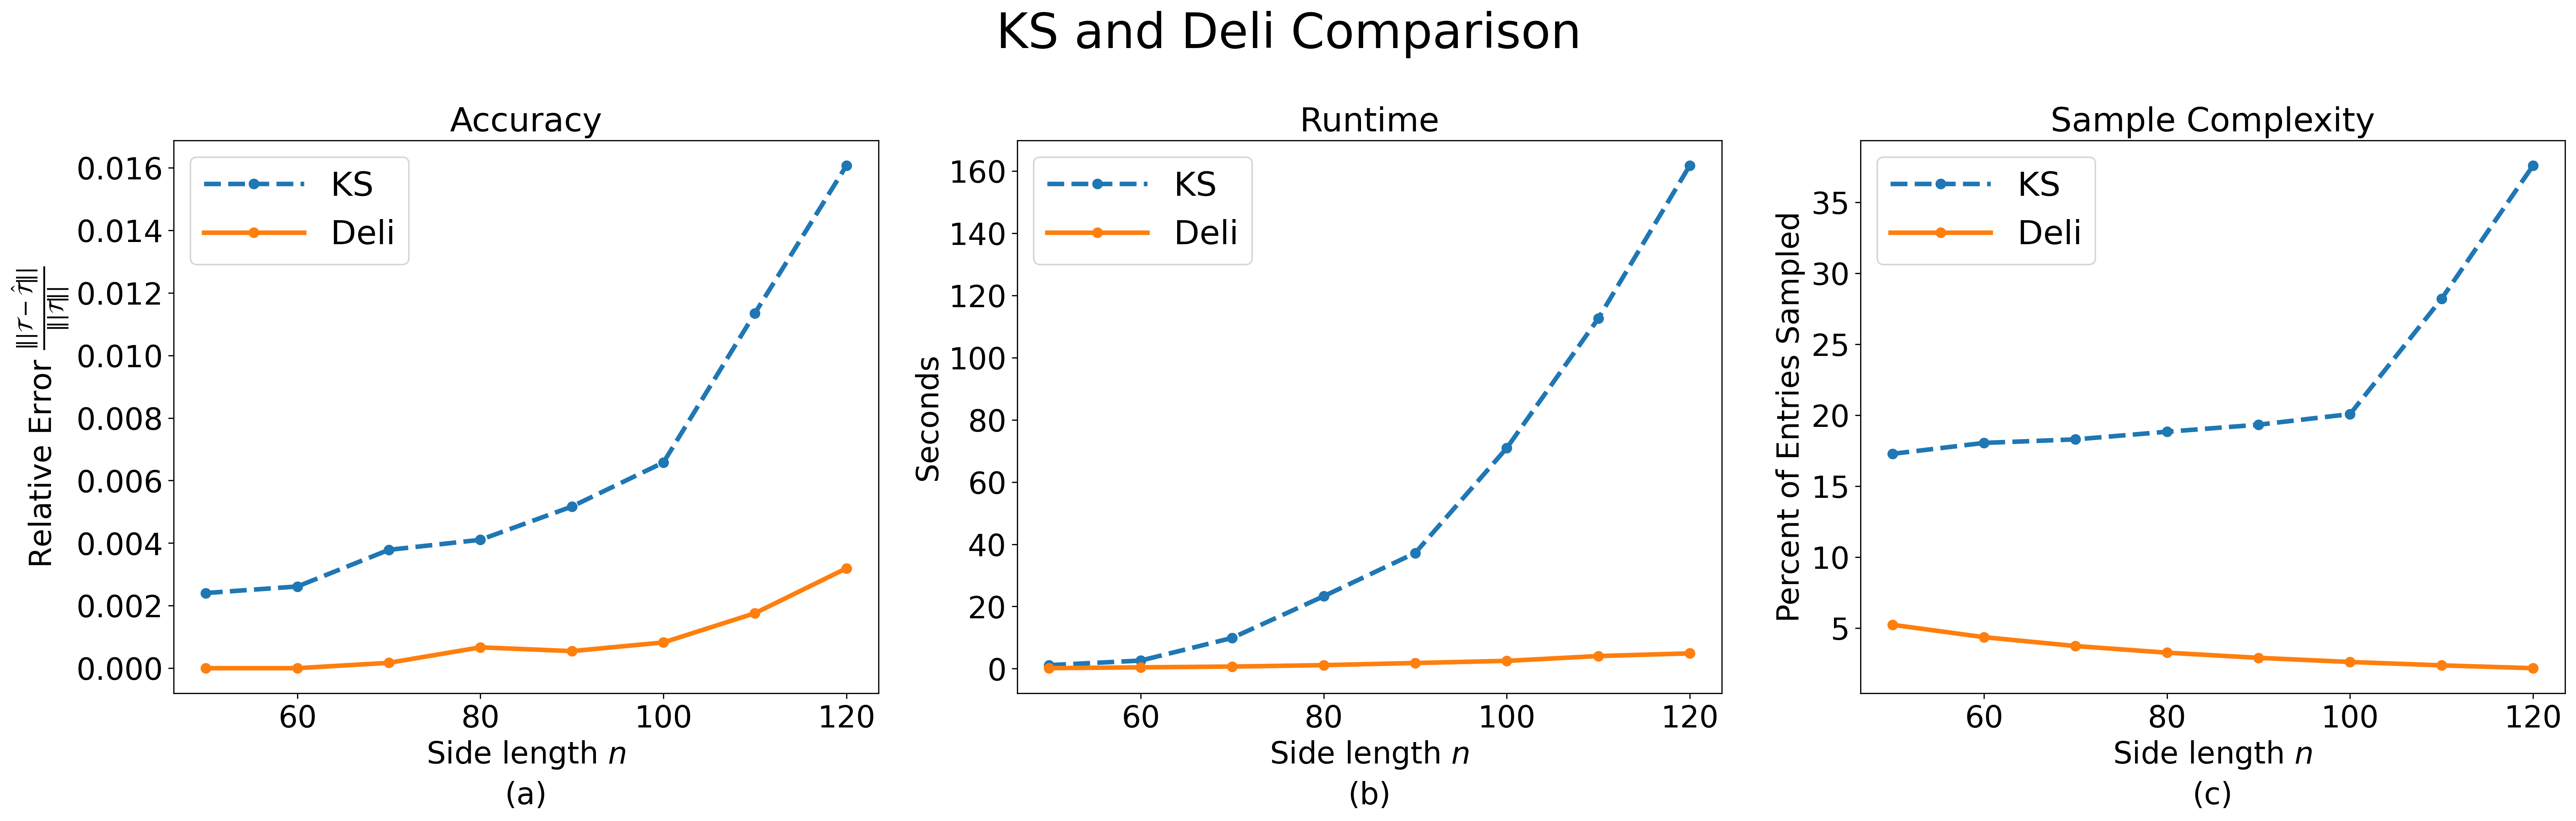

In [10]:
fig,ax = plt.subplots(1,3,figsize=(24,8),sharey=False, sharex=True)
plt.rcParams['font.size'] = 20
#fig.suptitle("Relative Error by Sample Complexity", fontsize=22)
color_dict = {5:'C0',10:'C1',15:'C2'}


df_ks=time_seq_df
df_deli=time_deli_df

ax[0].plot(df_ks['n'],df_ks['rel_error'], '--o',label='KS',linewidth=3)
ax[0].plot(df_deli['n'],df_deli['post_als_rel_error'], '-o',label='Deli',linewidth=3)

plt.gca().set_prop_cycle(None)

ax[1].plot(df_ks['n'],df_ks['time'], '--o',label='KS',linewidth=3)
ax[1].plot(df_deli['n'],df_deli['time'], '-o',label='Deli',linewidth=3)

plt.gca().set_prop_cycle(None)
ax[2].plot(df_ks['n'],100*df_ks['revealed'], '--o',label='KS',linewidth=3)
ax[2].plot(df_deli['n'],100*df_deli['revealed'], '-o',label='Deli',linewidth=3)

ax[0].set_title("Accuracy", fontsize=22)
ax[0].set(xlabel="Side length $n$", ylabel=r"Relative Error $\frac{\||\mathcal{T}-\mathcal{\hat{T}}\||}{\||\mathcal{T}\||}$")

ax[1].set_title("Runtime", fontsize=22)
ax[1].set(xlabel="Side length $n$", ylabel="Seconds")

ax[2].set_title("Sample Complexity", fontsize=22)
ax[2].set(xlabel="Side length $n$", ylabel="Percent of Entries Sampled")

ax[0].text(0.5,-0.2, "(a)", ha="center", 
         transform=ax[0].transAxes)
ax[1].text(0.5,-0.2, "(b)", ha="center", 
         transform=ax[1].transAxes)
ax[2].text(0.5,-0.2, "(c)", ha="center", 
         transform=ax[2].transAxes)

ax[0].legend(fontsize=22,  handlelength=3)
ax[1].legend(fontsize=22,  handlelength=3)
ax[2].legend(fontsize=22,  handlelength=3)
fig.suptitle("KS and Deli Comparison", fontsize=32)
fig.tight_layout() 
plt.show()


## Noise Comparison for Deli vs KS

load the raw data, note we have to split apart one of the columns to get the different parts of the sampling parameters into their own fields for the KS result. Furthermore, SNR is off by a factor of two in the original data, since it had 10 and not 20 as factor (forgot the square in the log term), so this is adjusted as well.

In [11]:
col_types = {'trial':int, 
             'n':int, 
             'r':int, 
             'order':int,
             'SNR':float, 
             'mode':str,
             'alpha':float,
             'slices':int,
             'beta':float,
             'delta':float,
             'gamma':float,
             'time':float,
             'adaptive':bool,
             'inner_als':bool,
             'rel_error':float,
             'matrix budget':int,
             'total budget':int,
             'post_als_rel_error':float,
             'revealed':float}

deli_results = pd.read_csv("data/deli_snr_compare.csv").astype(col_types)

group_deli = deli_results.groupby(['r','SNR'])

group_deli_summary = group_deli.agg( {'trial':'count', 
                                 'n':'min',
                                 'order':'min',
                                 'gamma':'min', 
                                 'mode':'min',
                                 'alpha':'min',
                                 'slices':'min',
                                 'beta':'min',
                                 'delta':'min',
                                 'time':'mean',
                                 'inner_als':'max',    
                                 'rel_error':'median',
                                 'post_als_rel_error':'median',
                                 'matrix budget':'mean',
                                 'total budget':'mean',
                                 'revealed':'mean'})

group_deli_summary = group_deli_summary.reset_index()

col_types = {'trial':int, 
             'n':int, 
             'r':int, 
             'order':int,
             'SNR':float, 
             'mode':str,
             'alpha':float,
             'sampling':str,
             'tolerance':float,
             'time':float,
             'revealed':float,
             'post_als_rel_error':float}


ks_results = pd.read_csv("data/ks_snr_results.csv").astype(col_types)


ks_results = ks_results[ks_results['SNR'] != np.inf]
group_seq = ks_results.groupby(['r','SNR'])
group_seq_summary = group_seq.agg( {'trial':'count', 
                                 'n':'min',
                                 'order':'min',
                                 'sampling':'min', 
                                 'mode':'min',
                                 'time':'mean',
                                 'rel_error':'median',
                                 'revealed':'mean',
                                 'post_als_rel_error':'median'})

group_seq_summary = group_seq_summary.reset_index()

group_seq_summary['sampling'] = group_seq_summary['sampling'].str.strip('[]')

group_seq_summary[['fiber_rate','face_rate']] = group_seq_summary['sampling'].str.split(',',expand=True)
group_seq_summary['fiber_rate'] = group_seq_summary['fiber_rate'].astype(float)
group_seq_summary['face_rate'] = group_seq_summary['face_rate'].astype(float)

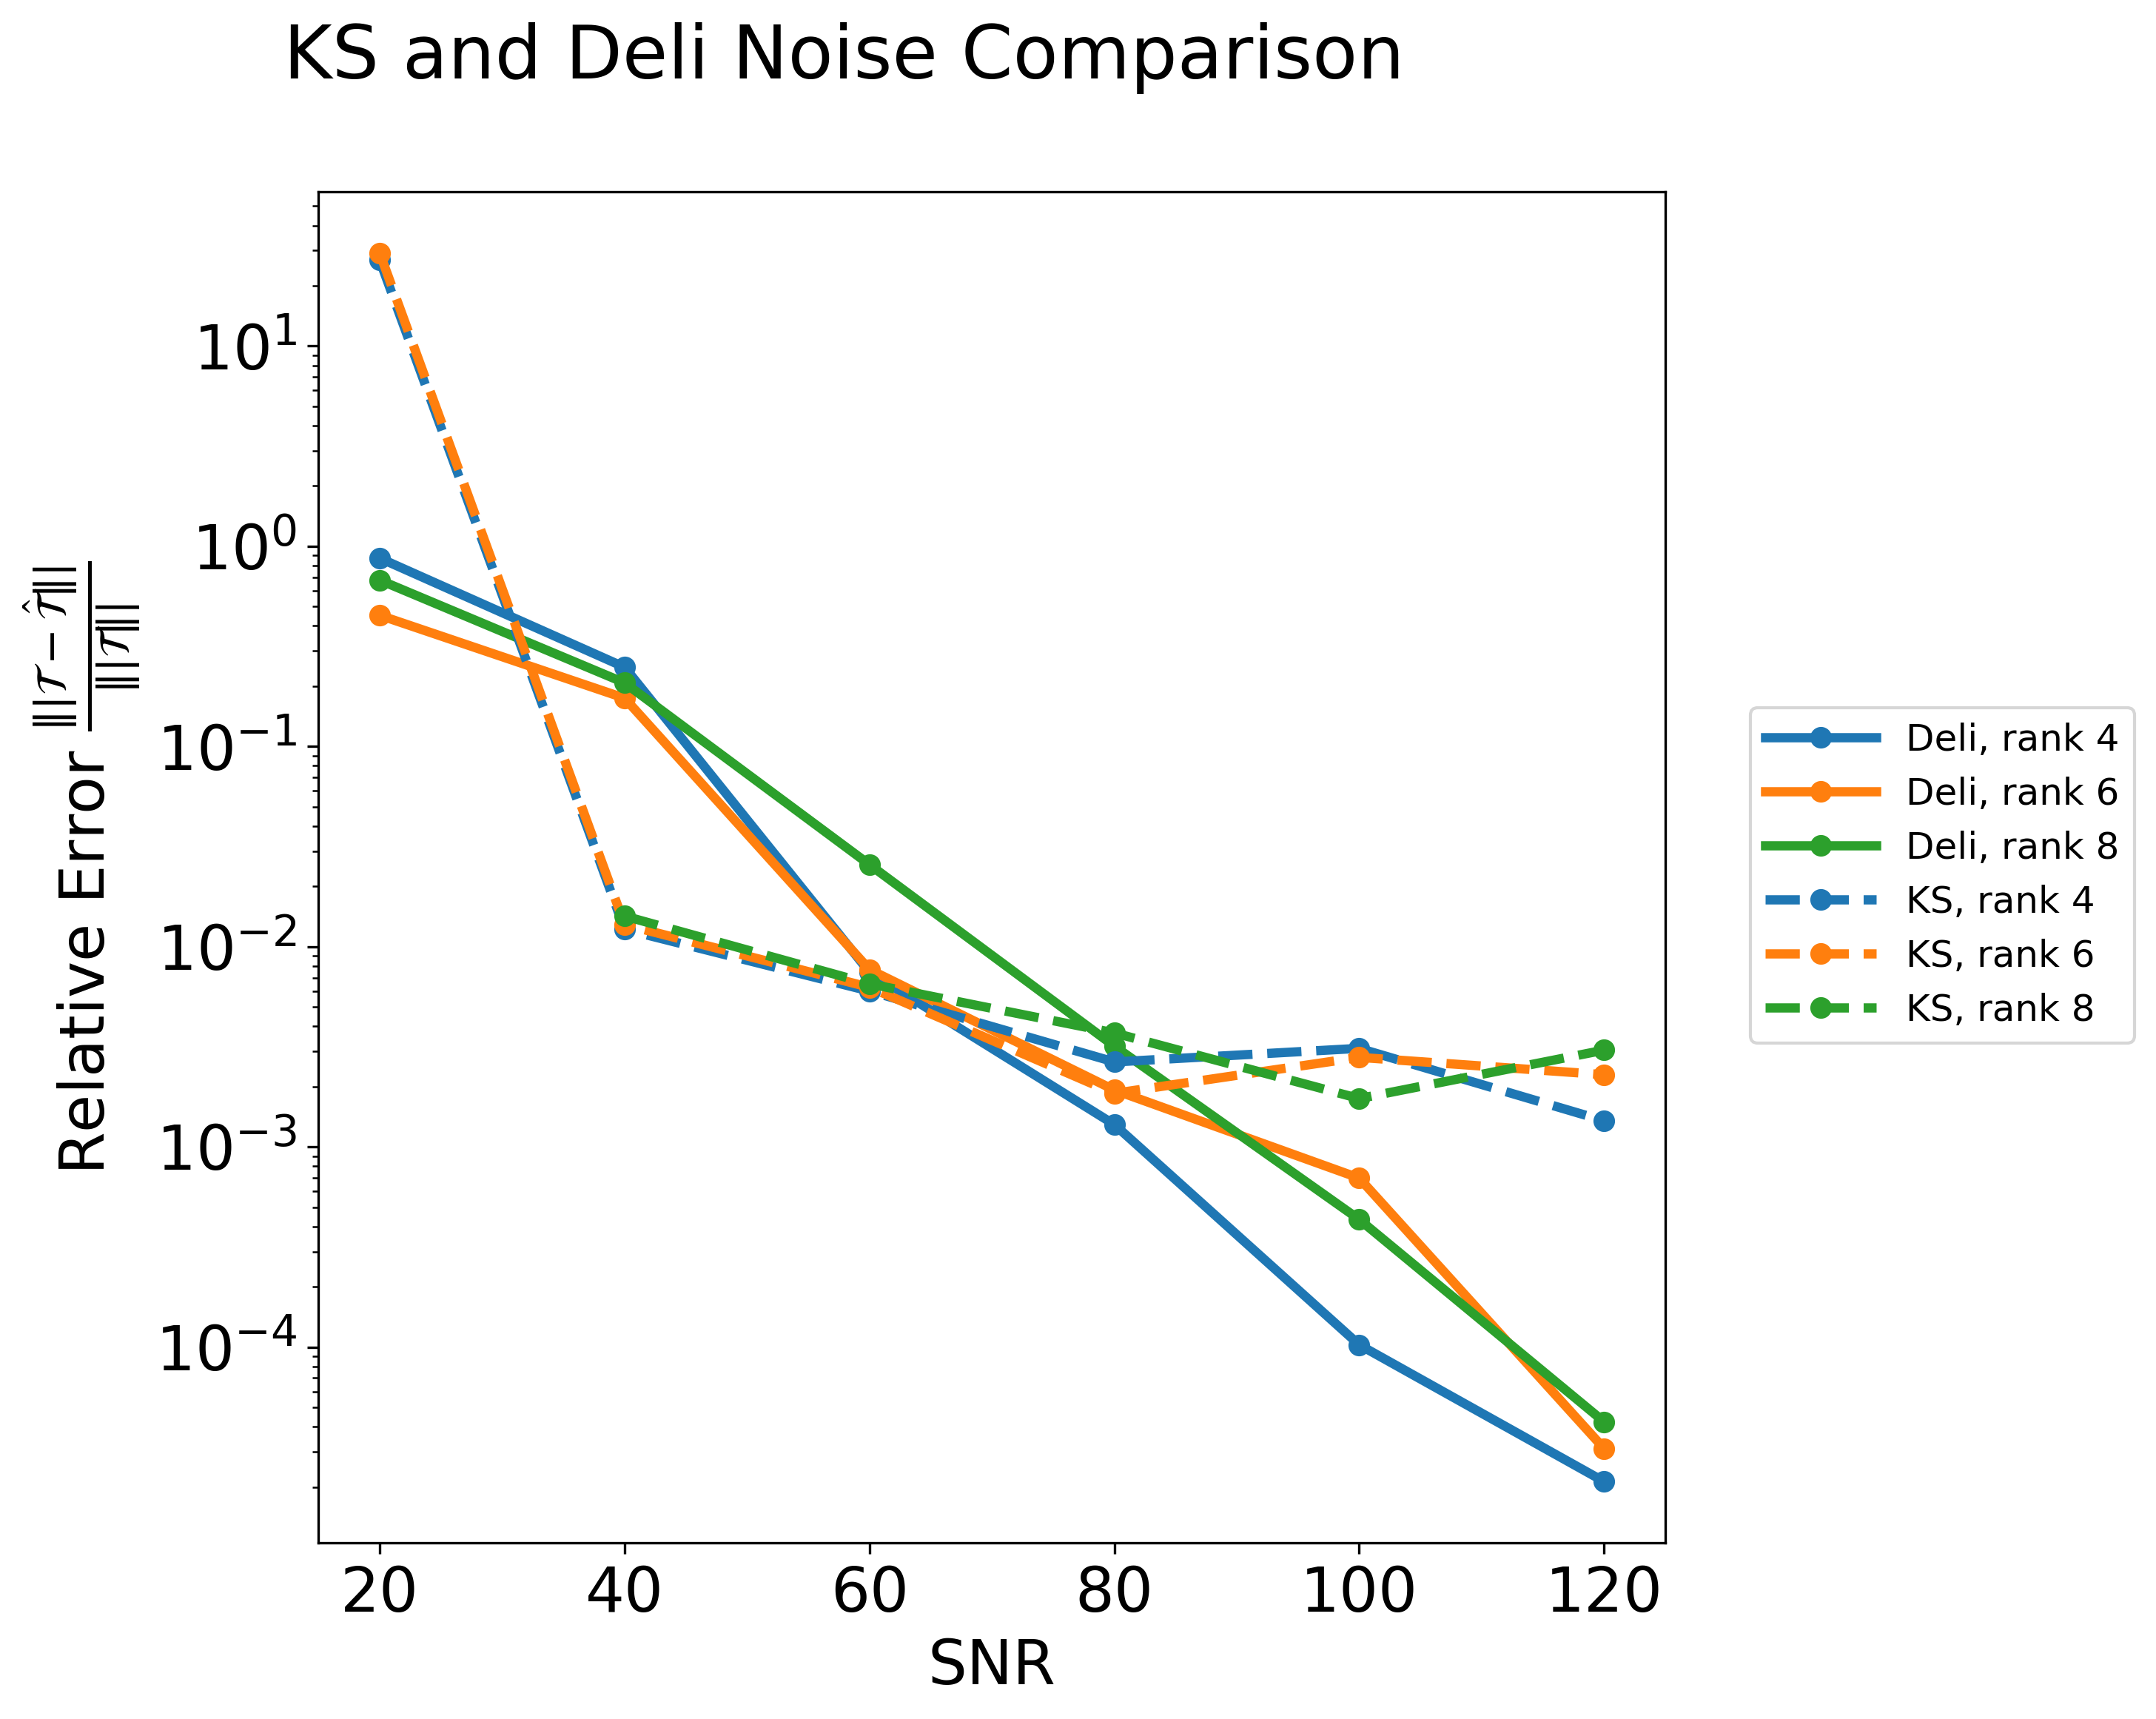

In [12]:
fig,ax = plt.subplots(1,1,figsize=(8,8),sharey=True)

plt.rcParams['font.size'] = 20
#fig.suptitle("Relative Error by Sample Complexity", fontsize=22)
color_dict = {2:'C3',4:'C0',6:'C1',8:'C2'}
df=group_deli_summary
for r in df['r'].unique(): 

    ax.plot(2*df[df['r']==r]['SNR'],df[df['r']==r]['rel_error'], '-o',label='Deli, rank '+str(r),linewidth=3, color=color_dict[r])
    
    
plt.gca().set_prop_cycle(None)

    
df=group_seq_summary
for r in df['r'].unique(): 

    ax.plot(2*df[df['r']==r]['SNR'],df[df['r']==r]['rel_error'], '--o',label='KS, rank '+str(r),linewidth=3,  color=color_dict[r])

    

ax.set(xlabel="SNR", ylabel=r"Relative Error $\frac{\||\mathcal{T}-\mathcal{\hat{T}}\||}{\||\mathcal{T}\||}$",yscale='log')

fig.suptitle("KS and Deli Noise Comparison")
fig.legend(loc='center left',bbox_to_anchor=(1, 0.5),fontsize=12, handlelength=3)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()



## Applications: fluorescence data

Load the original data, note that we only use one replicate (so its a three mode tensor) thus fix the last index to 0 in the raw data

Load in the pickles of the completed tensors are differing ranks, and with different sampling patterns (adapt vs not) and with ALS (or not)

In [13]:
mat = scipy.io.loadmat('data/fluordata.mat',simplify_cells=True)
fluor = mat['fluor']['data']
data = fluor[:,:,:,0]

pickle_files = glob.glob('data/big_fluor/*.pickle',recursive = False)

all_pickles = {'adapt':{},'nonadapt':{},'als':{}}

for file_name in pickle_files:
    with open(file_name, 'rb') as f:
        key_r = file_name.split("_")[3].split(".")[0]
        key_mode = file_name.split("_")[-1].split(".")[0]
        all_pickles[key_mode][key_r] = pickle.load(f)
        
#these are the slices. Note, index starts from 0, so that's why the label and these numbers are one off        
eem_slice = 150
my_slice = 8

min_val, max_val = np.amin( data[:,:,my_slice]), np.amax( data[:,:,my_slice])
eem_min_val, eem_max_val = np.amin( data[eem_slice,:,:]), np.amax( data[eem_slice,:,:])
full_recovered_tensor = {}

keys = ['11','15','19']

for k in keys:
    result = all_pickles['als'][k][0]
    recovered_factors = [np.copy(np.real(result[4][1][i])) for i in range(3)]
    recovered_weights = np.copy(np.real(result[4][0]))
    recovered_tensor = tl.cp_tensor.CPTensor((recovered_weights,recovered_factors))
    full_recovered_tensor[k] = np.real(tl.cp_to_tensor(recovered_tensor))
    
    #this min, max business is for getting the colorbars the same across all the slices in the image
    resultant = full_recovered_tensor[k][:,:,my_slice]
    new_min_val, new_max_val = np.amin(resultant), np.amax(resultant)
    if new_min_val < min_val: min_val = new_min_val
    if new_max_val > max_val: max_val = new_max_val

For some fixed slices, show the visual comparison of the completed tensors as well as display the relative error

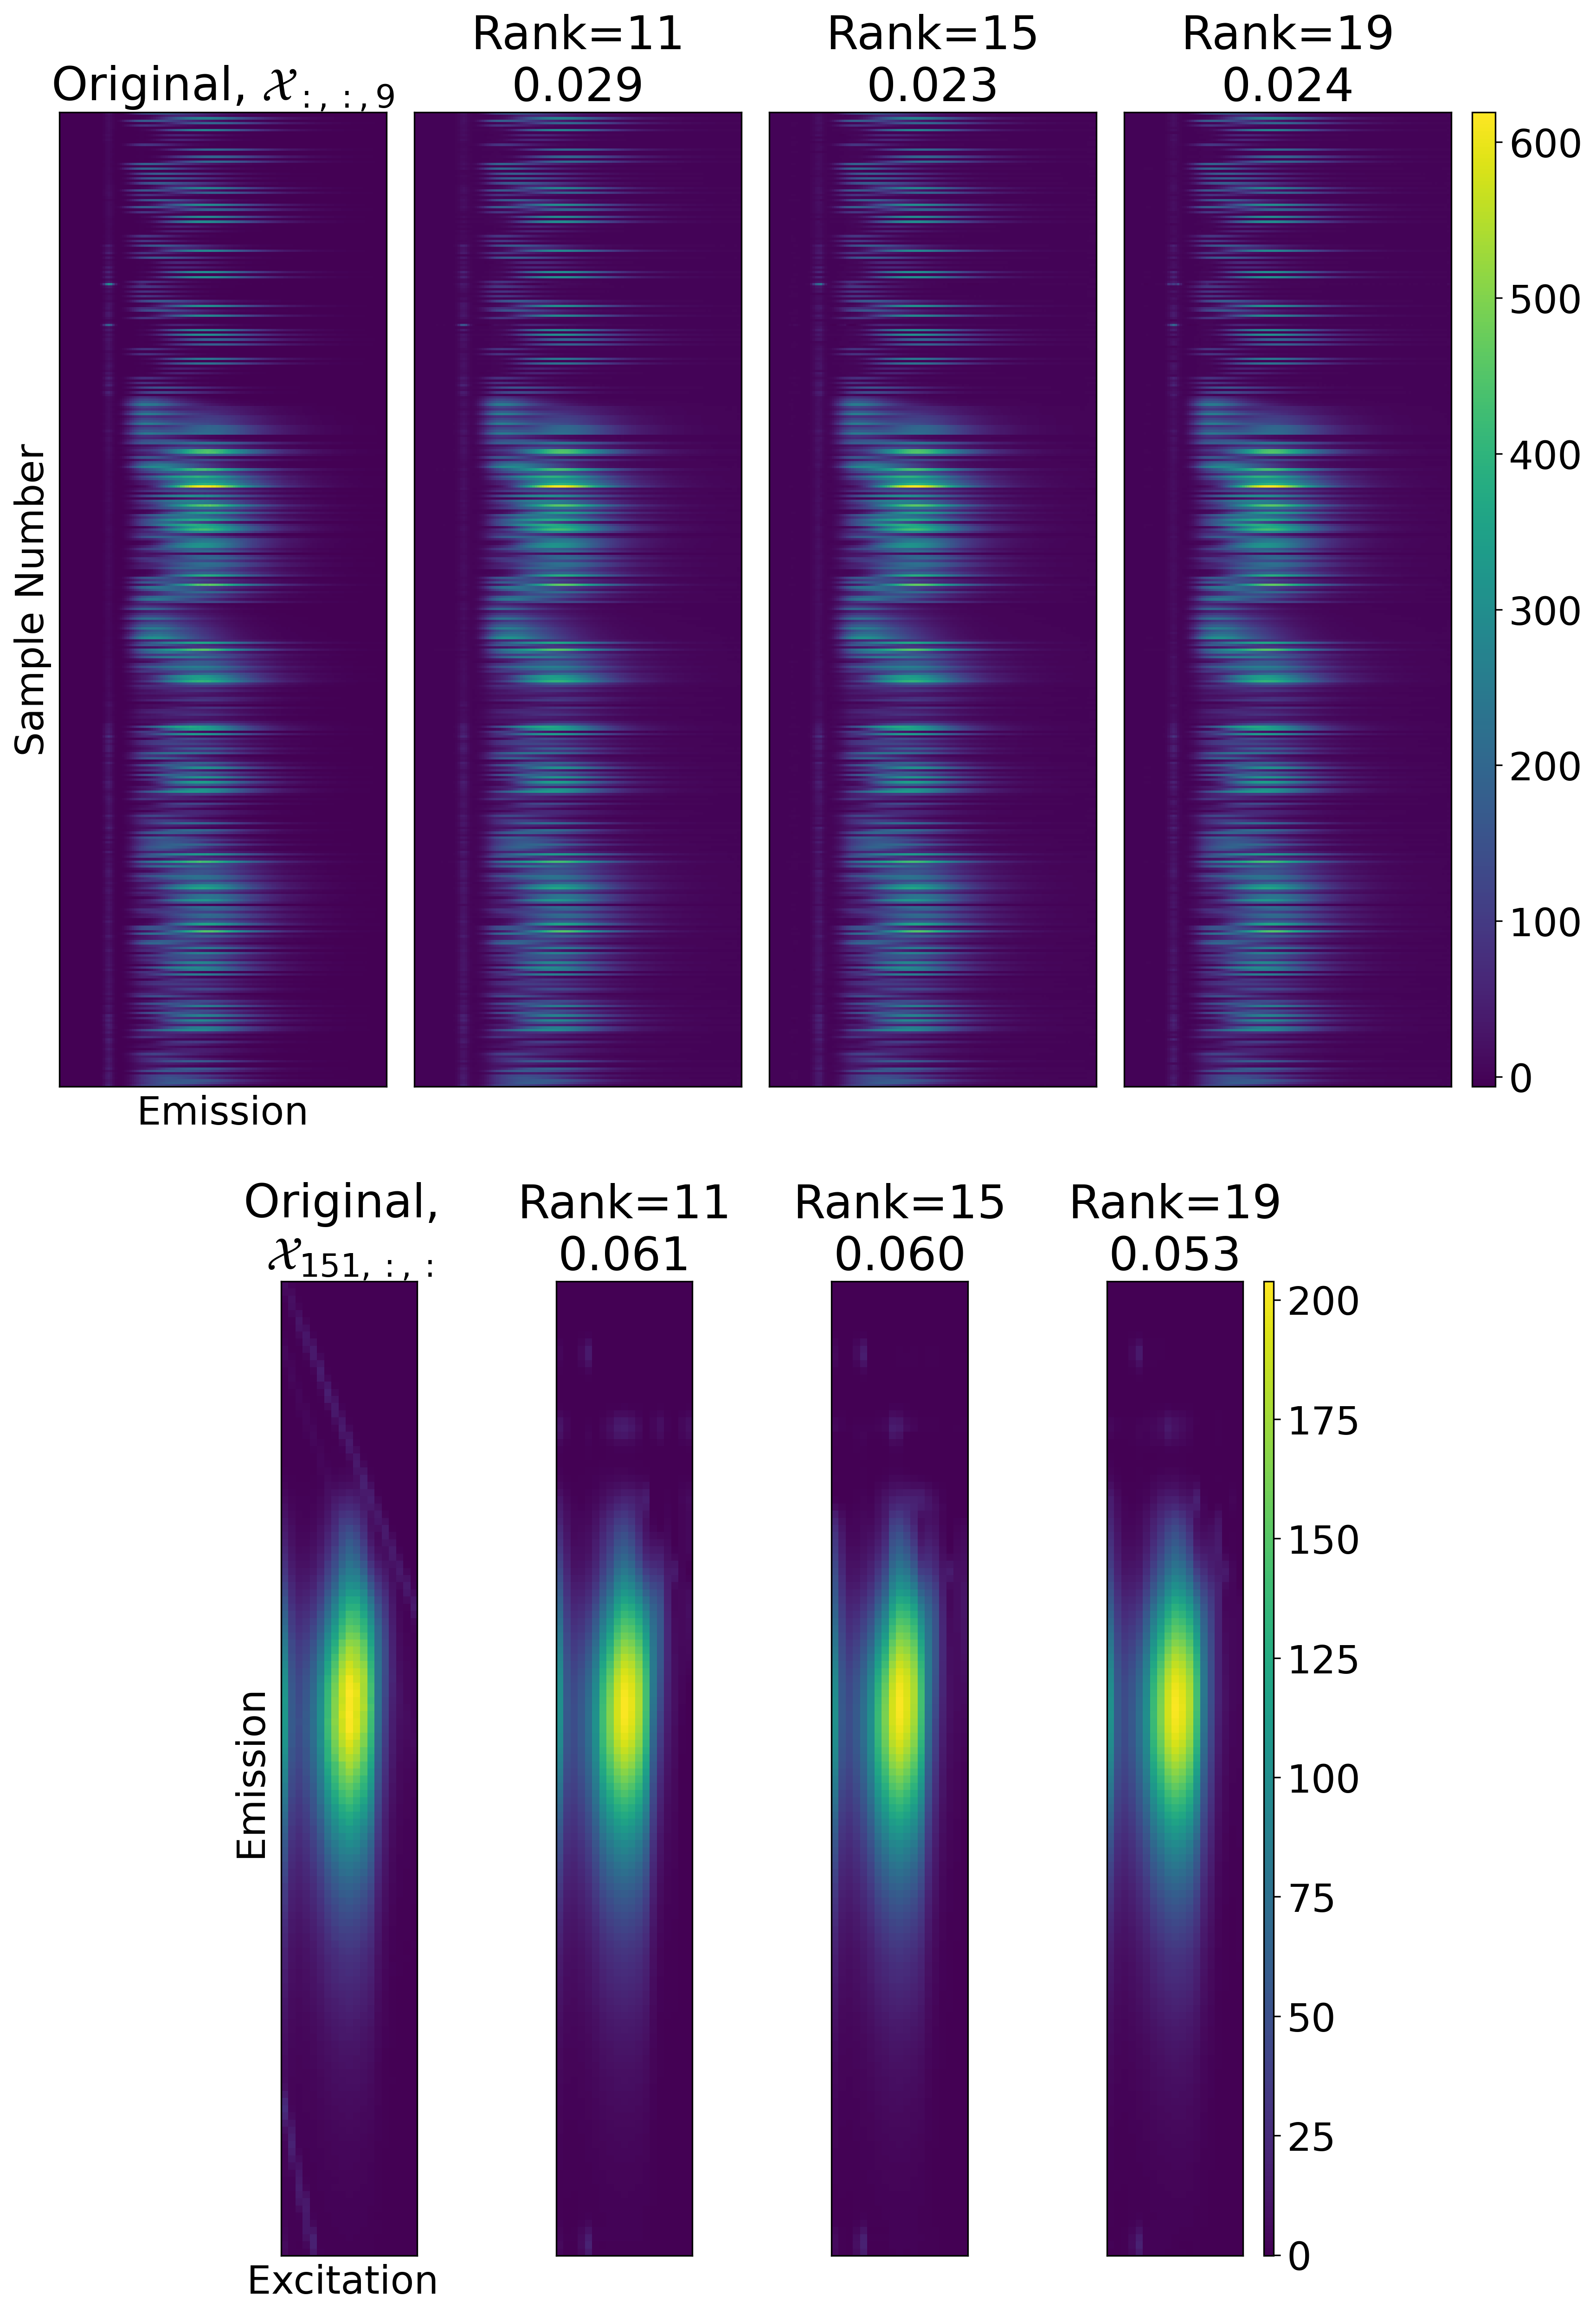

In [14]:
fig = plt.figure(figsize=(20,20))
top_grid = ImageGrid(fig, 211,         
                 nrows_ncols=(1,4),
                 axes_pad=0.2,
                 share_all=True,                 
                 label_mode="L",
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="7%",
                 cbar_pad=0.15,
                 cbar_set_cax=True
                 )
plt.xlabel("common")
cmaps = ["viridis", "viridis"]

im0 = top_grid[0].imshow(data[:,:,my_slice], cmap=cmaps[0])

top_grid[0].set_title(r'Original, $\mathcal{X}_{:,:,9}$')
top_grid[0].set_ylabel("Sample Number")
top_grid[0].set_xlabel("Emission")
top_grid[0].set_yticks([])     
top_grid[0].set_xticks([])         

data_norm = tl.norm(data[:,:,my_slice])

for i,k in enumerate(keys):

    im0 = top_grid[i+1].imshow(full_recovered_tensor[k][:,:,my_slice], vmin=min_val, vmax=max_val, cmap=cmaps[0])
    
    rel_error = tl.norm(full_recovered_tensor[k][:,:,my_slice]-data[:,:,my_slice]) / data_norm 
    top_grid[i+1].set_title("Rank="+k+"\n"+"{:.3f}".format(rel_error))
    
bottom_grid = ImageGrid(fig, 212,      
                 nrows_ncols=(1,4),
                 axes_pad=1,
                 share_all=True,                 
                 label_mode="1",
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="7%",
                 cbar_pad=0.15,
                 )


bottom_grid[0].set_ylabel("Emission ")
bottom_grid[0].set_xlabel("Excitation ")
bottom_grid[0].set_yticks([])     
bottom_grid[0].set_xticks([])  

im1 = bottom_grid[0].imshow(data[eem_slice,:,:], cmap=cmaps[1])
bottom_grid[0].set_title('Original, \n$\mathcal{X}_{151,:,:}$')
data_norm = tl.norm(data[eem_slice,:,:])

for i,k in enumerate(keys):
    im1 =bottom_grid[i+1].imshow(full_recovered_tensor[k][eem_slice,:,:], vmin=eem_min_val, vmax=eem_max_val,  cmap=cmaps[1])
    rel_error = tl.norm(full_recovered_tensor[k][eem_slice,:,:]-data[eem_slice,:,:]) / data_norm 
    bottom_grid[i+1].set_title("Rank="+k+"\n"+"{:.3f}".format(rel_error))

bottom_grid[-1].cax.colorbar(im1)
top_grid.cbar_axes[0].colorbar(im0)
bottom_grid.cbar_axes[1].colorbar(im1)
plt.show()


In [15]:
keys = ['adapt','als','nonadapt']
titles = {'als':"Adaptive \n Deli + ALS",'nonadapt':'Nonadaptive \n Deli','adapt':'Adaptive \n Deli' }

fig = plt.figure(figsize=(20,20))

bottom_grid = ImageGrid(fig, 211,          # as in plt.subplot(111)
                 nrows_ncols=(1,4),
                 axes_pad=1.1,
                 share_all=True,                 
                 label_mode="1",
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="7%",
                 cbar_pad=0.3,
                 )

bottom_grid[0].set_ylabel("Emission ")
bottom_grid[0].set_xlabel("Excitation ")
bottom_grid[0].set_yticks([])     
bottom_grid[0].set_xticks([])  

im1 = bottom_grid[0].imshow(data[eem_slice,:,:], cmap=cmaps[1])
bottom_grid[0].set_title('Original \n $\mathcal{X}_{151,:,:}$')
data_norm = tl.norm(data[eem_slice,:,:])

full_recovered_tensor_sample = {}

result = all_pickles['adapt']['15'][0]
recovered_factors = [np.copy(np.real(result[4][1][i])) for i in range(3)]
recovered_weights = np.copy(np.real(result[4][0]))
recovered_tensor = tl.cp_tensor.CPTensor((recovered_weights,recovered_factors))
full_recovered_tensor_sample['adapt'] = np.real(tl.cp_to_tensor(recovered_tensor))

result = all_pickles['als']['15'][0]
recovered_factors = [np.copy(np.real(result[4][1][i])) for i in range(3)]
recovered_weights = np.copy(np.real(result[4][0]))
recovered_tensor = tl.cp_tensor.CPTensor((recovered_weights,recovered_factors))
full_recovered_tensor_sample['als'] = np.real(tl.cp_to_tensor(recovered_tensor))
    
result = all_pickles['nonadapt']['15'][0]
recovered_factors = [np.copy(np.real(result[4][1][i])) for i in range(3)]
recovered_weights = np.copy(np.real(result[4][0]))
recovered_tensor = tl.cp_tensor.CPTensor((recovered_weights,recovered_factors))
full_recovered_tensor_sample['nonadapt'] = np.real(tl.cp_to_tensor(recovered_tensor))

for i,k in enumerate(keys):
    im1 =bottom_grid[i+1].imshow(full_recovered_tensor_sample[k][eem_slice,:,:], vmin=eem_min_val, vmax=eem_max_val,  cmap=cmaps[1])
    rel_error = tl.norm(full_recovered_tensor_sample[k][eem_slice,:,:]-data[eem_slice,:,:]) / data_norm 
    bottom_grid[i+1].set_title(titles[k]+"\n"+"{:.3f}".format(rel_error))
    
bottom_grid[-1].cax.colorbar(im1)
bottom_grid.cbar_axes[1].colorbar(im1)

plt.tight_layout
plt.show()

In [16]:
# open a file, where you stored the pickled data
file = open('data/result_pines_ranks_slices9.pickle', 'rb')

# dump information to that file
result_pines_ranks = pickle.load(file)

# close the file
file.close()

mat = scipy.io.loadmat('data/Indian_pines_corrected.mat',simplify_cells=True)
data = mat['indian_pines_corrected']

#Let's normalize and center the data, also should be floats instead of ints, which this also accomplishes
data = data / np.max(data)
data = data - np.mean(data)

In [17]:
result_pines_ranks[3][4][1][1].shape

(145, 60)

In [18]:
post_als_pines = []
R=[30,40,50,60]
for i,r in enumerate(R):
    result = result_pines_ranks[i]
    init_recovered_factors = [np.copy(result[4][1][i]) for i in range(3)]
    init_recovered_weights = np.copy(result[4][0])
    post_als_pines.append(parafac(data,r,init=(init_recovered_weights, init_recovered_factors),n_iter_max = 10,mask=result[5],verbose=1))

reconstruction error=0.027867880662923113
iteration 1, reconstruction error: 0.026763433428225614, decrease = 0.001104447234697499, unnormalized = 9.016598406884007
iteration 2, reconstruction error: 0.025972344235744637, decrease = 0.0007910891924809774, unnormalized = 8.750852768702941
iteration 3, reconstruction error: 0.02536921347348637, decrease = 0.0006031307622582673, unnormalized = 8.54834813924125
iteration 4, reconstruction error: 0.024886261976246278, decrease = 0.0004829514972400917, unnormalized = 8.386256751820925
iteration 5, reconstruction error: 0.02448333074220452, decrease = 0.00040293123404175693, unnormalized = 8.251058227887082
iteration 6, reconstruction error: 0.024135686110216253, decrease = 0.0003476446319882684, unnormalized = 8.134429391010565
iteration 7, reconstruction error: 0.023827676009569386, decrease = 0.00030801010064686676, unnormalized = 8.0311059832811
iteration 8, reconstruction error: 0.023549152019795856, decrease = 0.00027852398977352977, un

In [19]:
just_als_pines = []
for i,r in enumerate(R):
    result = result_pines_ranks[i]

    just_als_pines.append(parafac(data,r,n_iter_max = 10,mask=result[5],verbose=1))

reconstruction error=0.04926242586085945
iteration 1, reconstruction error: 0.045186380705856045, decrease = 0.004076045155003406, unnormalized = 14.94908842323139
iteration 2, reconstruction error: 0.038222736912273576, decrease = 0.006963643793582469, unnormalized = 12.648062031404123
iteration 3, reconstruction error: 0.03352366448237823, decrease = 0.004699072429895347, unnormalized = 11.095689441636097
iteration 4, reconstruction error: 0.030750816099862424, decrease = 0.002772848382515805, unnormalized = 10.18028218939139
iteration 5, reconstruction error: 0.02893248712018041, decrease = 0.0018183289796820136, unnormalized = 9.58041463976701
iteration 6, reconstruction error: 0.02763200059373892, decrease = 0.001300486526441491, unnormalized = 9.151661228663098
iteration 7, reconstruction error: 0.026655592296367516, decrease = 0.0009764082973714033, unnormalized = 8.829958164452458
iteration 8, reconstruction error: 0.025898422058645676, decrease = 0.0007571702377218402, unnorma

Slice: 47
RANK 30
DELI 0.286
DELI+ALS 0.13395543066010826
ALS 0.21640750237723058
RANK 40
DELI 0.246
DELI+ALS 0.1184246220075859
ALS 0.2155975273442908
RANK 50
DELI 0.213
DELI+ALS 0.11459976573848485
ALS 0.21523951985539602
RANK 60
DELI 0.360
DELI+ALS 0.10762275726698857
ALS 0.21551048685408936


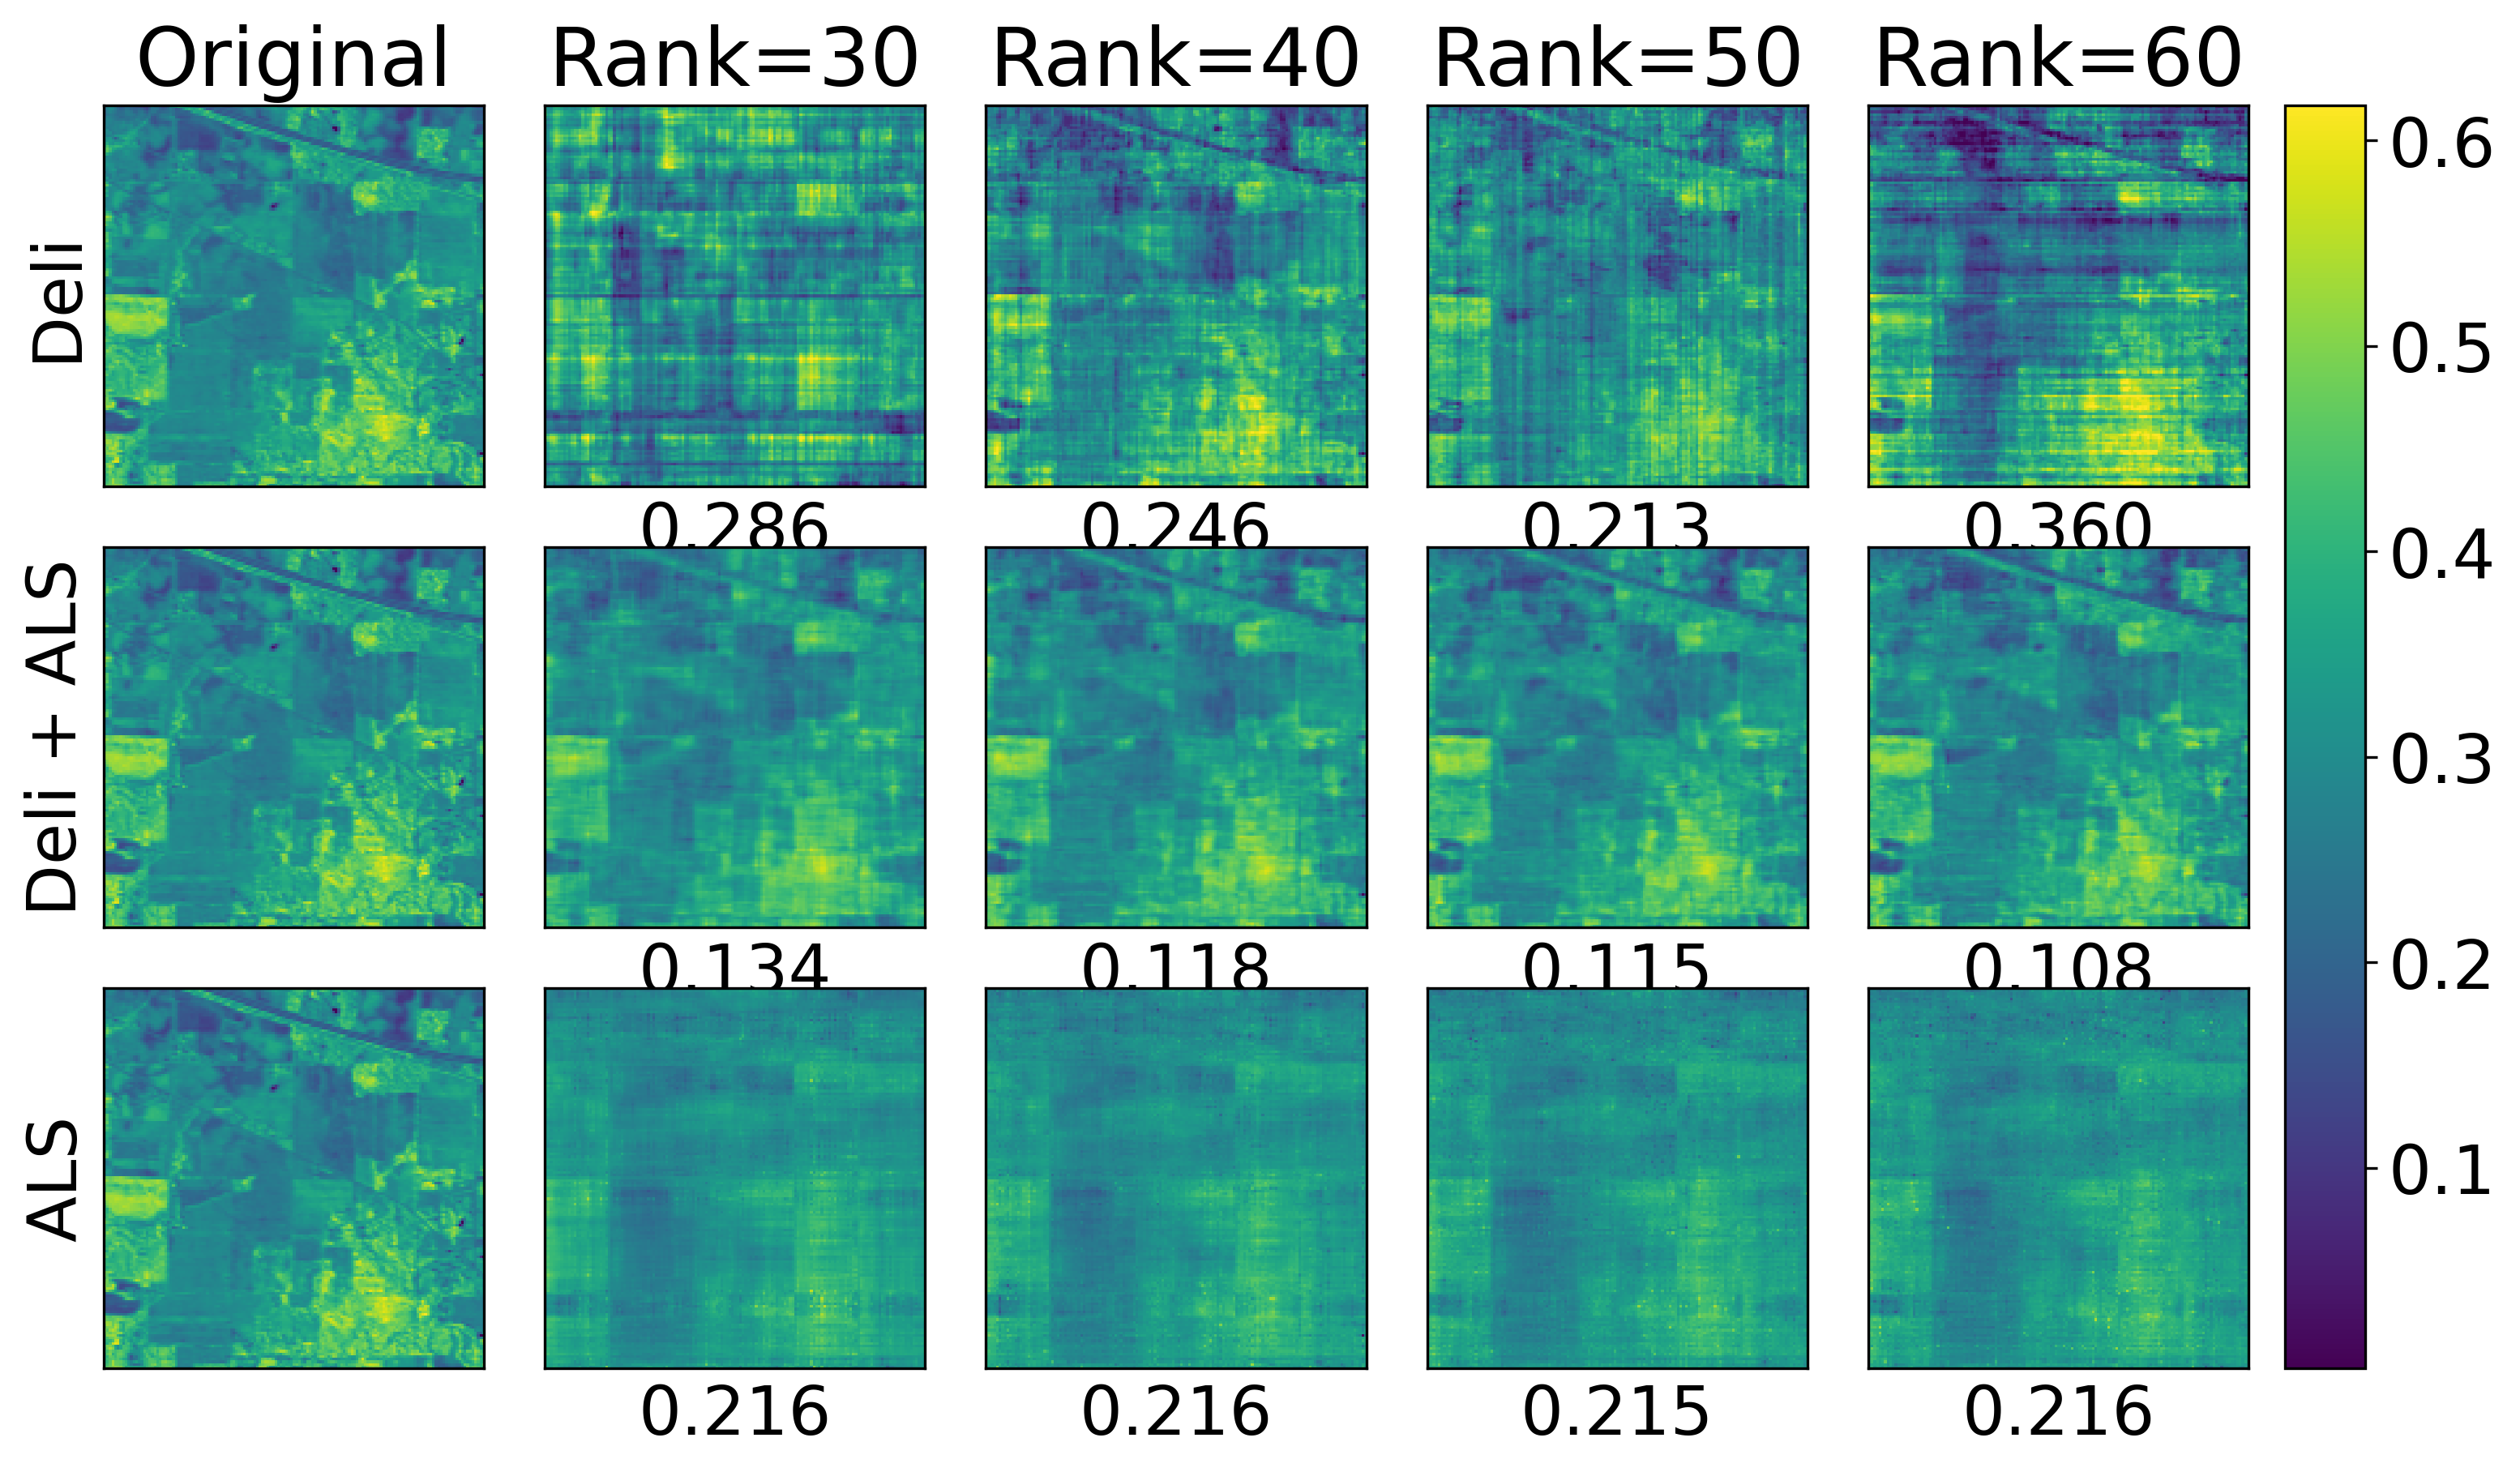

In [20]:
my_slice = 47
min_val, max_val = np.amin( data[:,:,my_slice]), np.amax( data[:,:,my_slice])

for i,r in enumerate(R):
    result = result_pines_ranks[i]
    recovered_factors = [np.copy(result[4][1][i]) for i in range(3)]
    recovered_weights = np.copy(result[4][0])
    recovered_tensor = tl.cp_tensor.CPTensor((recovered_weights,recovered_factors))
    full_recovered_tensor = np.real(tl.cp_to_tensor(recovered_tensor))
    
    
    full_recovered_tensor_als = np.real(tl.cp_to_tensor(post_als_pines[i]))
    full_recovered_tensor_just_als = np.real(tl.cp_to_tensor(just_als_pines[i]))
    
    resultant = np.array([full_recovered_tensor[:,:,my_slice], full_recovered_tensor_als[:,:,my_slice],full_recovered_tensor_just_als[:,:,my_slice]])
    new_min_val, new_max_val = np.amin(resultant), np.amax(resultant)
    if new_min_val < min_val: min_val = new_min_val
    if new_max_val > max_val: max_val = new_max_val

print("Slice:", my_slice)

# Set up figure and image grid
fig = plt.figure(figsize=(12,10))
cols = 5
grid = ImageGrid(fig, 111,          # as in plt.subplot(111)
                 nrows_ncols=(3,cols),
                 axes_pad=0.25,
                 share_all=True,
                 label_mode='all',
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="7%",
                 cbar_pad=0.15,
                 )

# Add data to image grid
im = grid[0].imshow(data[:,:,my_slice])
grid[0].set(ylabel="Deli")
grid[cols].set(ylabel="Deli + ALS")
grid[2*cols].set(ylabel="ALS")
im = grid[cols].imshow(data[:,:,my_slice])
im = grid[2*cols].imshow(data[:,:,my_slice])
grid[2*cols].set_yticks([])     
grid[2*cols].set_xticks([])  
grid[0].set_title("Original")
min_val, max_val = np.amin( data[:,:,my_slice]), np.amax( data[:,:,my_slice])
data_norm = tl.norm(data)
for i,r in enumerate(R):
    print("RANK", r)
    result = result_pines_ranks[i]
    recovered_factors = [np.copy(result[4][1][i]) for i in range(3)]
    recovered_weights = np.copy(result[4][0])
    recovered_tensor = tl.cp_tensor.CPTensor((recovered_weights,recovered_factors))
    full_recovered_tensor = np.real(tl.cp_to_tensor(recovered_tensor))
    
    
    full_recovered_tensor_als = np.real(tl.cp_to_tensor(post_als_pines[i]))
    full_recovered_tensor_just_als = np.real(tl.cp_to_tensor(just_als_pines[i]))
    print("DELI", "{:.3f}".format(result[0]))
    print("DELI+ALS", tl.norm(full_recovered_tensor_als -data) / data_norm)
    print("ALS", tl.norm(full_recovered_tensor_just_als -data) / data_norm)

    im = grid[i+1].imshow(full_recovered_tensor[:,:,my_slice], vmin=min_val, vmax=max_val)
    grid[i+1].set_title("Rank="+str(r))
    grid[i+1].set(xlabel="{:.3f}".format(result[0]))
    im = grid[cols+i+1].imshow(full_recovered_tensor_als[:,:,my_slice], vmin=min_val, vmax=max_val)
    grid[cols+i+1].set(xlabel="{:.3f}".format( tl.norm(full_recovered_tensor_als -data) / data_norm))
    im = grid[2*cols+i+1].imshow(full_recovered_tensor_just_als[:,:,my_slice], vmin=min_val, vmax=max_val)
    grid[2*cols+i+1].set(xlabel="{:.3f}".format( tl.norm(full_recovered_tensor_just_als -data) / data_norm))

    
grid[-1].cax.colorbar(im)
grid[-1].cax.toggle_label(True) 

plt.show()